<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import statistics as stats
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [0]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def mean(arr):
  """ Takes a list of numbers and returns the mean. """
  total = 0
  for num in arr:
    total += num
    
  return total/len(arr)

In [0]:
# Actual mean for reference
stats.mean(sales)

3052.714285714286

In [0]:
# Calculated mean
mean(sales)

3052.714285714286

In [0]:
def sample_variance(arr):
  """  """
  Xhat = mean(arr)
  numerator = 0
  for num in arr:
    numerator += (num - Xhat)**2
  return numerator/(len(arr)-1)

In [0]:
# Actual variance
stats.variance(sales)

214387.90476190476

In [0]:
# Calculated variance
sample_variance(sales)

214387.90476190473

In [0]:
# Standard deviation for the test data is 2.67 (POPULATION VARIANCE)
# https://www.sciencebuddies.org/science-fair-projects/science-fair/variance-and-standard-deviation

test = [3,4,4,5,6,8] 

print(stats.variance(test))
sample_variance(test)

3.2


3.2

In [0]:
# Actual standard deviation
stats.stdev(sales)

463.02041505953576

In [0]:
# Calculated standard deviation
math.sqrt(sample_variance(sales))

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customer_count = [127, 80, 105, 92, 120, 115, 93]

In [0]:
# def covariance(arr1, arr2):
#   Xhat1 = mean(arr1)
#   Xhat2 = mean(arr2)
#   numerator = 0
#   for num1 in arr1:
#     for num2 in arr2:
#     numerator += (num1 - Xhat1)*(num2-Xhat2)
#   return numerator/(len(sales))

In [0]:
data = {"a": sales, "b": customer_count}

df = pd.DataFrame(data)
df

,a,b
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [0]:
# Variance-Covariance Matrix

# Returns variance vals along main diagonal and 
# covariance vals everywhere else

# Variance: MEASURE OF DATA'S SPREAD 

# Covariance: MEASURE OF HOW CHANGES IN ONE VAR ARE 
# ASSOCIATED WITH CHANGES IN A SECOND VAR

varcovar_matrix = df.cov()
varcovar_matrix

,a,b
a,214387.904762,7604.357143
b,7604.357143,290.952381


In [0]:
# This means that you can't compare the covariances between variables that have 
# a different scale. Two variablespositive covariance variable that has a large 
# scale will always have a higher covariance than a variable with an equally 
# strong relationship, yet smaller scale. This means that we need a way to regularlize

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# If we divide our covariance values by the product of the standard deviations 
# of the two variables, we'll end up with what's called the Correlation 
# Coefficient. (Sometimes just referred to as the correlation).

In [0]:
correlation = varcovar_matrix.copy()
correlation

,a,b
a,214387.904762,7604.357143
b,7604.357143,290.952381


In [0]:
stdev_sales = stats.stdev(sales)
stdev_customers = stats.stdev(customer_count)

product = stdev_sales*stdev_customers

In [0]:
correlation.iloc[0,0] = correlation.iloc[0,0]/(stdev_sales**2)
correlation.iloc[1,1] = correlation.iloc[1,1]/(stdev_customers**2)

correlation.iloc[0,1] = correlation.iloc[0,1]/product
correlation.iloc[1,0] = correlation.iloc[1,0]/product

In [0]:
correlation

,a,b
a,1.000000,0.962834
b,0.962834,1.000000


In [0]:
# Checking work with built in correlation coefficient table
df.corr()

,a,b
a,1.000000,0.962834
b,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.isna().sum()

pclass                 1
survived               1
name                   1
sex                    1
age                    0
sibsp                  1
parch                  1
ticket                 1
fare                   2
cabin               1015
embarked               0
boat                 824
body                1189
home.dest            565
has_cabin_number       0
dtype: int64

In [0]:
# Body, boat, home.dest, and cabin columns are largely missing so I will remove them
df.drop(['body', 'cabin', 'home.dest', 'boat'], axis=1, inplace=True)
df.isna().sum()

pclass              1
survived            1
name                1
sex                 1
age                 0
sibsp               1
parch               1
ticket              1
fare                2
embarked            0
has_cabin_number    0
dtype: int64

In [0]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,0.225191
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,0.417867
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [0]:
df.describe(exclude='number')

,name,sex,ticket,embarked
count,1309,1309,1309,1310
unique,1307,2,929,3
top,"Kelly, Mr. James",male,CA. 2343,S
freq,2,843,11,917


In [0]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,0.174613


In [0]:
corr = df.corr()
corr

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,1.000000


In [0]:
corr.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1,-0.31,-0.37,0.061,0.018,-0.56,-0.71
survived,-0.31,1,-0.05,-0.028,0.083,0.24,0.3
age,-0.37,-0.05,1,-0.19,-0.13,0.17,0.27
sibsp,0.061,-0.028,-0.19,1,0.37,0.16,-0.0091
parch,0.018,0.083,-0.13,0.37,1,0.22,0.037
fare,-0.56,0.24,0.17,0.16,0.22,1,0.51
has_cabin_number,-0.71,0.3,0.27,-0.0091,0.037,0.51,1


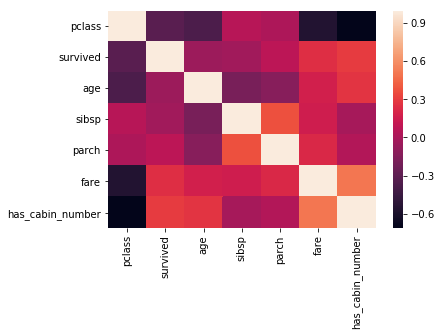

In [0]:
sns.heatmap(corr)

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# Orthogonal is synonymous to perpendicular

vector_1 = [0, 5]
vector_2 = [5, 0]

plt.axes().set_aspect('equal')

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.title("Orthogonal Vectors")
plt.show()

NameError: ignored

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# Dot product of orthogonal vectors is zero
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a,b)

In [0]:
# Not orthogonal, unlike the previous example
np.dot(vector_1,vector_2)

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2,-15,6,20]

# The norm (magnitude) squared of vector c
print(np.linalg.norm(c)**2, "\n")

# The dot product of vector c with itself
print(np.dot(c,c), "\n")

# The product of vector c transposed and vector c
print(np.matmul(np.transpose(c), c))

In [0]:
# They are all equal...

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
lc1 = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
lc2 = \begin{bmatrix} 2\\11\\-8 \end{bmatrix} = 2\begin{bmatrix} 1\\0\\0 
\end{bmatrix} + 11\begin{bmatrix} 0\\1\\0 \end{bmatrix} + -8\begin{bmatrix} 0\\0\\1 \end{bmatrix} = 2\hat{i} + 12\hat{j} - 8\hat{z} 
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# In Linear Algebra a unit vector is any vector of "unit length" (1). 
# You can turn any non-zero vector into a unit vector by dividing it by 
# its norm (length/magnitude).

f = [4,12,11,9,2]
f

In [0]:
norm = np.linalg.norm(f)

In [0]:
f_hat = f/norm
print(f_hat)

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

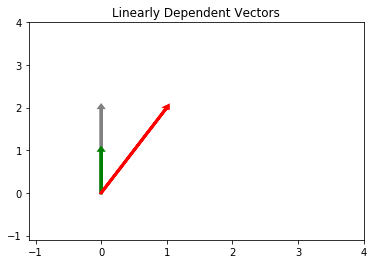

In [0]:
# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [0,1] 

# Linearly dependent to v
v2 = np.multiply(2, v)

# Linearly independent to v
v3 = [1,2]

plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='grey')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

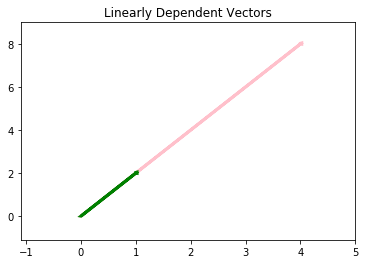

In [0]:
# Axis Bounds
plt.xlim(-1.1,5)          
plt.ylim(-1.1,9)

# Original Vector
g = [1,2]
h = [4,8]

plt.arrow(0,0, h[0], h[1], linewidth=3, head_width=.05, head_length=0.05, color ='pink')
plt.arrow(0,0, g[0], g[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')

plt.title("Linearly Dependent Vectors")
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()